# **Analysis of the data**

## **Preliminary steps**

In [1]:
import os 
print(os.getcwd())
os.chdir('ml-for-nlp')
print(os.getcwd())

/Users/Corentin/Desktop/ENSAE 2024-2025/S2/NLP/final project 
/Users/Corentin/Desktop/ENSAE 2024-2025/S2/NLP/final project /ml-for-nlp


In [2]:
### PACKAGES

import pandas as pd
import numpy as np

In [3]:
### FUNCTIONS

from src.libs import preprocessing, visualization

from src.configs import names, constants

In [4]:
pd.set_option("display.max_columns", None)

## **RAW DATA**

In [5]:
### LOAD DATA

df_gpt = preprocessing.load_dataset(source="GPT", type="STORY")
df_bard = preprocessing.load_dataset(source="BARD", type="STORY")
df_human = preprocessing.load_dataset(source="Human", type="STORY")

Time taken to load dataset: 0.031934261322021484 seconds
Time taken to load dataset: 0.012768030166625977 seconds
Time taken to load dataset: 0.013142108917236328 seconds


In [6]:
### GET TRAIN SPLIT

df_train_gpt, _ = preprocessing.train_valid_split(df_gpt)
df_train_bard, _ = preprocessing.train_valid_split(df_bard)
df_train_human, _ = preprocessing.train_valid_split(df_human)

In [7]:
### CHECK SHAPES

print(f"Shape of the GPT train set : {df_train_gpt.shape}")
print(f"Shape of the BARD train set : {df_train_bard.shape}")
print(f"Shape of the HUMAN train set : {df_train_human.shape}")

Shape of the GPT train set : (85, 3)
Shape of the BARD train set : (270, 2)
Shape of the HUMAN train set : (162, 16)


In [8]:
### CHECK STRUCTURE - GPT

df_train_gpt.sample(n=5)

,index,Title,Chapter_text
56,56,Enemies’ Deal,"Chapter Text\nLoki sat in the dimly lit bar, n..."
58,58,Tony's diary in the Overworld (ChatGPT experim...,"Dear diary,I don't know how I got here, but I'..."
59,59,Passion's Tempest: A Love Story in Ng Palace.,Chapter Text\nThe busy capital of Enngstan was...
14,14,AI generated fanfic: The argument - a Breaking...,(prompt: write an scene where its an argument ...
69,69,"Chat GPT, tell me a story",Chapter Text\n\n\n\n\n\nHermione Granger and D...


In [9]:
### CHECK STRUCTURE - BARD

df_train_bard.sample(n=5)

,prompts,BARD
194,Tell the story of a group of warriors chosen t...,\nThe Chosen Ones\n\nThe year is 2042. A group...
269,Imagine a world where people have the ability ...,The year is 2042. The world is a very differen...
12,Imagine a world where music has the power to c...,The year is 2042. The world is a very differen...
93,Imagine a world where people are born with uni...,\nThe year is 2042. The world is a very differ...
207,Write a story about a character who can see gl...,\nThe Seer\n\nThe year is 2042. In a world whe...


In [10]:
### CHECK STRUCTURE - HUMAN

df_train_human.sample(n=5)

,Title,Author,Fandoms,Required_tags,Datetime,Tags,ChatGPT_Tag,Summary,Language,Words,Chapters,Comments,Kudos,Bookmarks,Hits,Chapter_text
143,Make Me,Soffya,Lupin III,[],23 Mar 2023,"['No Archive Warnings Apply', 'Mine Fujiko', '...",No,Fujiko pushed the door open and entered the ro...,English,863,1/1,NaN,NaN,1.0,5,Fujiko arrived in front of the vault room. She...
1,lightning-struck,tigriswolf,"Scream (Movies), Highlander: The Series",[],23 Mar 2023,"['Creator Chose Not To Use Archive Warnings', ...",No,"Stu wakes up in a coffin and thinks, fuck.",English,711,1/1,NaN,NaN,NaN,0,"Stu wakes up in a coffin and thinks, fuck. Las..."
7,nightcord,mirrormazes,プロジェクトセカイ カラフルステージ！| Project SEKAI COLORFUL ST...,[],23 Mar 2023,"['Creator Chose Not To Use Archive Warnings', ...",No,NaN,English,156,1/1,NaN,NaN,NaN,0,25JI.\n\n \n\n6:00 pm \n\n \n\namia\n\n\ndo y’...
84,A kiss where it hurts,erikaeurekajoe,SEVENTEEN (Band),[],23 Mar 2023,"['No Archive Warnings Apply', 'Choi Seungcheol...",No,Jeonghan was just dragged along by Jisoo to wa...,English,773,1/1,NaN,4.0,1.0,20,"“Come on, you promised.” Jisoo whined as tugge..."
132,Metamorphosis,BastardcoreSS_endzz,Super Dangan Ronpa 2,[],23 Mar 2023,"['Rape/Non-Con', 'Underage', 'Nidai Nekomaru',...",No,"Nekomaru was always an energetic boy, although...",English,437,1/?,NaN,NaN,NaN,5,"Chapter Text\n""Don't be too sad, Nekomaru. The..."


In [11]:
df_train_human.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Title', 'Author', 'Fandoms', 'Required_tags', 'Datetime', 'Tags',
       'ChatGPT_Tag', 'Summary', 'Language', 'Words', 'Chapters', 'Comments',
       'Kudos', 'Bookmarks', 'Hits', 'Chapter_text'],
      dtype='object')>

In [12]:
### CHECK MISSING VALUES

for df, name in zip(
    [df_train_gpt, df_train_bard, df_train_human], ["GPT", "BARD", "HUMAN"]
):
    print(f"Missing values in {name} dataset :")
    print(df.isna().sum())
    print("\n")

Missing values in GPT dataset :
index           0
Title           0
Chapter_text    4
dtype: int64


Missing values in BARD dataset :
prompts    0
BARD       0
dtype: int64


Missing values in HUMAN dataset :
Title              0
Author             9
Fandoms            0
Required_tags      0
Datetime           0
Tags               0
ChatGPT_Tag        0
Summary            5
Language           0
Words              0
Chapters           0
Comments         135
Kudos             96
Bookmarks        141
Hits               0
Chapter_text       2
dtype: int64




In [13]:
### CHECK EMPTY TEXT

for df, name in zip(
    [df_train_gpt, df_train_bard, df_train_human], ["GPT", "BARD", "HUMAN"]
):
    print(f"Empty text in {name} dataset :")
    if name == "BARD":
        print(len(df[df["BARD"] == ""]))
    elif name == "GPT":
        print(len(df[df["Chapter_text"] == ""]))
    elif name == "HUMAN":
        print(len(df[df["Chapter_text"] == "\r\r\n"]))
    print("\n")

Empty text in GPT dataset :
0


Empty text in BARD dataset :
0


Empty text in HUMAN dataset :
0




In [14]:
### CHECK DUPLICATES

for df, name in zip(
    [df_train_gpt, df_train_bard, df_train_human], ["GPT", "BARD", "HUMAN"]
):
    print(f"Duplicate rows in {name} dataset :")
    print(df.duplicated().sum())
    print("\n")

Duplicate rows in GPT dataset :
0


Duplicate rows in BARD dataset :
0


Duplicate rows in HUMAN dataset :
3




## **CLEAN DATA**

In [15]:
### CLEAN AND CONCATENATE DATASETS

df_train = preprocessing.get_story_dataset(
    df_train_gpt, df_train_bard, df_train_human, samples_per_source=200
)

In [16]:
### CHECK

df_train.sample(10)

,text,abstract,label,type
537,The year is 2042. The world is a very differen...,Tell the story of a person who finds a magical...,2,story
132,Neil Josten couldn't believe his luck when he ...,【巨豬】Ribbons,1,story
578,The Magical Object The year is 2042. A young w...,Write a story about a character who can commun...,2,story
84,Adam Raki had heard a lot about his brother's ...,ChatGPT Generated Fanfiction,1,story
373,12-year-old Emily had always been different fr...,Write a story about a character who can commun...,2,story
320,Hermione Granger and Draco Malfoy had always b...,What They Desire,1,story
306,"Once upon a time, in a world of wizards and wi...",The Fall of Ye Xiu,1,story
148,"Once upon a time, there was a passionate photo...",An accidental kiss,1,story
139,(prompt: Write a romantic Brendon Urie x Ryan ...,"A generic tale, as old as time",1,story
1,As Sam Winchester drove his older brothers car...,Help me girlies,0,story


In [17]:
### CHECK EMPTY TEXTS

df_train[df_train["text"] == ""]

,text,abstract,label,type


In [18]:
### CHECK SPLIT

df_train[names.LABEL].value_counts()

label
1    200
0    200
2    200
Name: count, dtype: int64

## **PLOTS**

In [19]:
### PLOT ABSTRACT LENGTH DISTRIBUTION (CHARACTERS)

sentence_lengths_chars = np.array(df_train[names.TEXT].str.len())
visualization.plot_histogram_sentence_length(
    sentence_lengths=sentence_lengths_chars,
    labels=df_train[names.LABEL],
    type="characters",
)

RuntimeError: Failed to process string with tex because latex could not be found

Error in callback <function _draw_all_if_interactive at 0x15b9b5940> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1200x600 with 3 Axes>

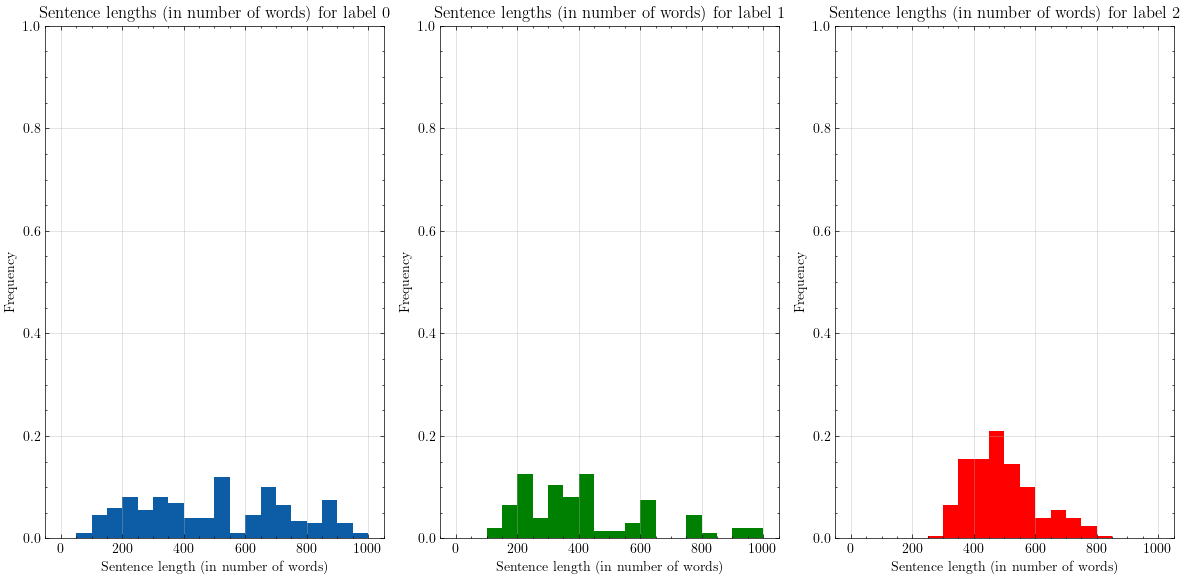

In [19]:
### PLOT ABSTRACT LENGTH DISTRIBUTION (WORDS)

sentence_lengths_words = np.array(df_train[names.TEXT].str.split().str.len())
visualization.plot_histogram_sentence_length(
    sentence_lengths=sentence_lengths_words, labels=df_train[names.LABEL], type="words"
)

In [20]:
### PLOT WORDCLOUD FOR EACH TEXT

texts = df_train[names.TEXT].to_numpy()
labels = df_train[names.LABEL].to_numpy()

visualization.plot_wordcloud_slider(texts=texts, labels=labels)

interactive(children=(IntSlider(value=0, description='ID', max=599), Output()), _dom_classes=('widget-interact…